In [14]:
pip install Pillow

In [69]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation , Dropout , Flatten , Dense
from keras.utils import to_categorical 
from keras.models import load_model

In [16]:
directory = r'C:\Users\semih\Desktop\brain_tumor'
no = r'C:\Users\semih\Desktop\brain_tumor\no'
yes = r'C:\Users\semih\Desktop\brain_tumor\yes'
no_tumor =os.listdir(no)
yes_tumor = os.listdir(yes)
dataset = []
label = []


In [17]:
for i , image_name in enumerate(no_tumor):
    if(image_name.split('.')[1]=='jpg'):
        image = cv2.imread(directory + '/no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)
print(image)

<PIL.Image.Image image mode=RGB size=64x64 at 0x28024BAA310>


In [18]:
for i , image_name in enumerate(yes_tumor):
    if(image_name.split('.')[1]=='jpg'):
        image = cv2.imread(directory + '/yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64,64))
        dataset.append(np.array(image))
        label.append(1)
print(image)

<PIL.Image.Image image mode=RGB size=64x64 at 0x28039807FD0>


In [19]:
dataset = np.array(dataset)
label = np.array(label)

In [20]:
x_train , x_test , y_train , y_test = train_test_split(dataset , label , test_size = 0.2, random_state=0)
x_train = normalize(x_train , axis=1)
x_test = normalize(x_test , axis=1)


In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape = (64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3),kernel_initializer ='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),kernel_initializer ='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.fit(x_train,y_train,
          batch_size=16,
          verbose=1 ,
          epochs=10,
         validation_data=(x_test,y_test), shuffle = False)
model.save('brain_tumor.h5')

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9675 - val_loss: 0.2208
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9967 - loss: 0.0104 - val_accuracy: 0.9675 - val_loss: 0.4145
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9642 - val_loss: 0.3660
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9659 - val_loss: 0.3648
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9998 - loss: 9.2274e-04 - val_accuracy: 0.9675 - val_loss: 0.3292
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 1.0000 - loss: 4.9014e-04 - val_accuracy: 0.9659 - val_loss: 0.3152
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9962 - loss: 0.0128 - val_accuracy: 0.9707 - val_loss: 0.2227
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9937 - loss: 0.0186 -

In [40]:
def load_and_preprocess_images(file_path):
    img = Image.open(file_path)
    img = img.resize((64, 64))   
    img = np.array(img) / 255.0  
    img = np.expand_dims(img, axis=0) 
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


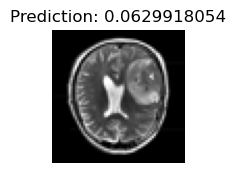

In [112]:
dosya_yolu = r"C:\Users\semih\Desktop\brain_tumor\yes\y56.jpg"
test_images = load_and_preprocess_images(dosya_yolu)

predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(len(test_images)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i])
    prediction_value = float(predictions[i])  
    plt.title("Prediction: {:.10f}".format(prediction_value))
    plt.axis("off")
plt.show()
